### Load library

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# scikit  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

### Load data

In [65]:
# load data
wh_data = pd.read_csv('weight-height/weight-height.csv')

# drop first column
wh_data = wh_data.drop(wh_data.columns[0], axis=1)
wh_data = wh_data.drop(wh_data.columns[2], axis=1)
# wh_data.head()

### BMI

In [66]:
# Tính chỉ số BMI
wh_data['BMI'] = wh_data['Weight (kg)'] / (wh_data['Standing Height (cm)'] / 100) ** 2

# Phân loại BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Thêm cột phân loại vào DataFrame
wh_data['Category'] = wh_data['BMI'].apply(classify_bmi)

wh_data.head(20)

,Weight (kg),Standing Height (cm),BMI,Category
0,97.1,160.2,37.835041,Obese
1,98.8,182.3,29.729226,Overweight
2,74.3,184.2,21.898258,Normal
3,103.7,185.3,30.201459,Obese
4,83.3,177.1,26.558765,Overweight
5,91.1,152.7,39.069720,Obese
6,72.6,158.4,28.935185,Overweight
7,73.0,161.2,28.092655,Overweight
8,81.4,161.3,31.286406,Obese
9,86.0,167.8,30.543200,Obese


### Plot

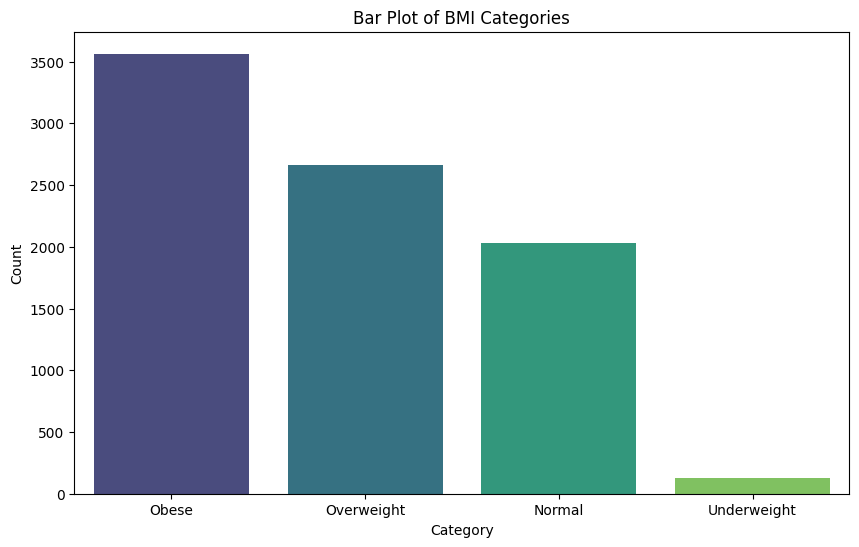

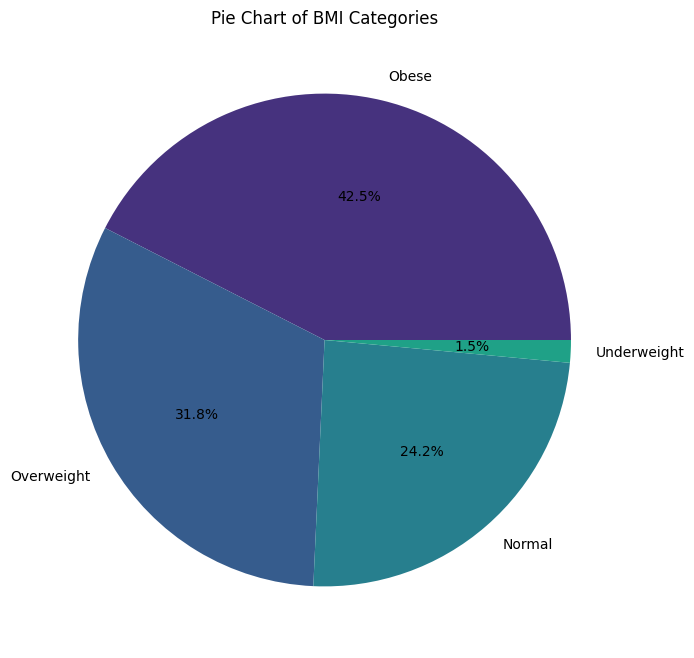

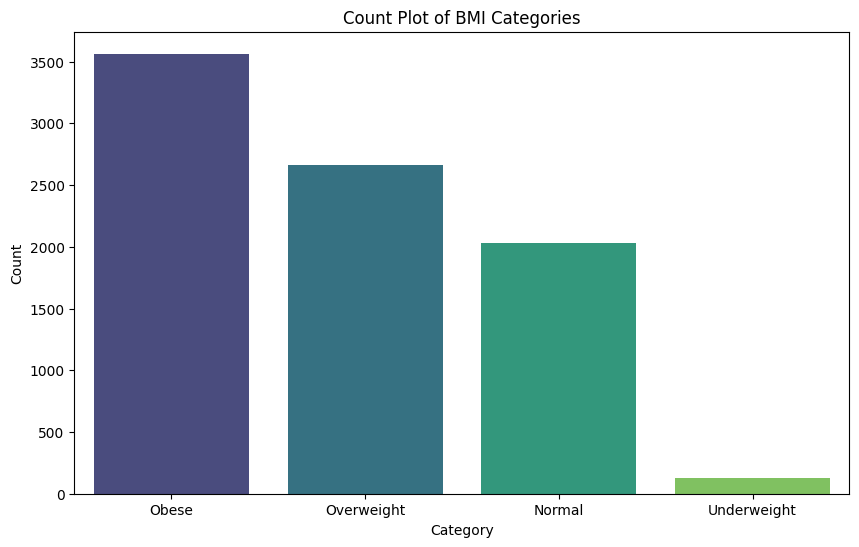

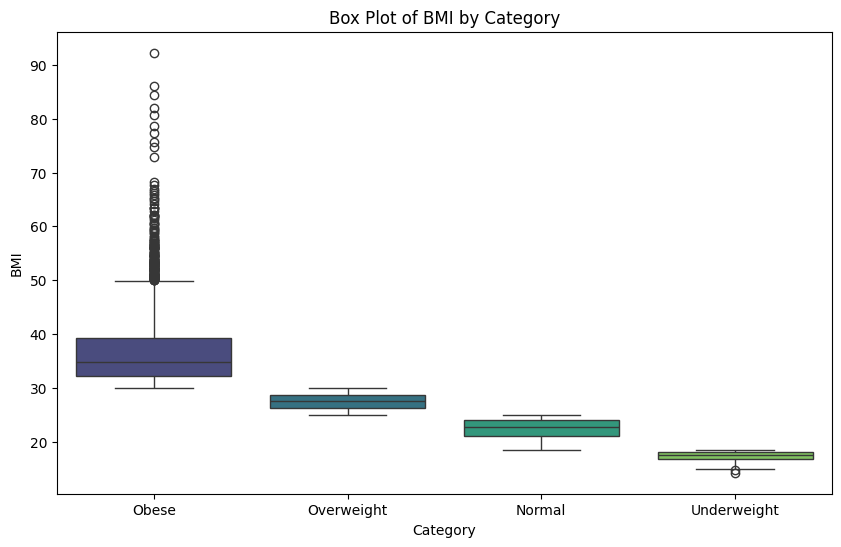

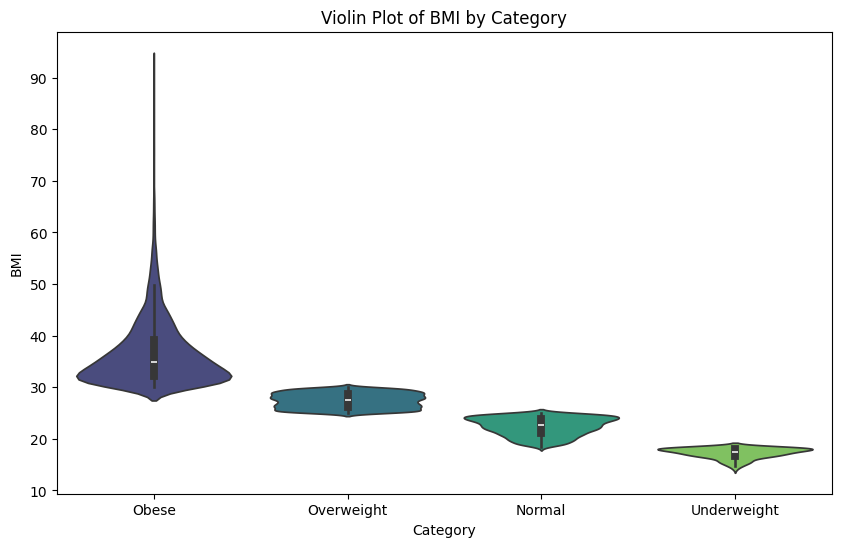

In [67]:
# Đếm số lượng theo phân loại
category_counts = wh_data['Category'].value_counts()

# 1. Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Bar Plot of BMI Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 2. Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Pie Chart of BMI Categories')
plt.show()

# 3. Count Plot (Seaborn)
plt.figure(figsize=(10, 6))
sns.countplot(data=wh_data, x='Category', hue='Category', palette='viridis', dodge=False, legend=False)
plt.title('Count Plot of BMI Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 4. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=wh_data, x='Category', y='BMI', hue='Category', palette='viridis', dodge=False, legend=False)
plt.title('Box Plot of BMI by Category')
plt.xlabel('Category')
plt.ylabel('BMI')
plt.show()

# 5. Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=wh_data, x='Category', y='BMI', hue='Category', palette='viridis', dodge=False, legend=False)
plt.title('Violin Plot of BMI by Category')
plt.xlabel('Category')
plt.ylabel('BMI')
plt.show()

In [68]:
# Chuyển đổi cột Category thành các giá trị nhị phân (0, 1, 2, 3)
category_map = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
wh_data['Category'] = wh_data['Category'].map(category_map)

# Tách dữ liệu thành features và labels
X = wh_data[['Weight (kg)', 'Standing Height (cm)']]
y_classification = wh_data['Category']  # Dữ liệu cho phân loại
y_regression = wh_data['BMI']  # Dữ liệu cho hồi quy

# Chia dữ liệu train/test
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)
_, _, y_train_regression, y_test_regression = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Phân loại cơ bản

# Logistic Regression
clf_logistic = LogisticRegression()
clf_logistic.fit(X_train, y_train_classification)
y_pred_logistic = clf_logistic.predict(X_test)

# Decision Tree Classifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train_classification)
y_pred_tree = clf_tree.predict(X_test)

# K-Nearest Neighbors
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train_classification)
y_pred_knn = clf_knn.predict(X_test)

# 2. Hồi quy cơ bản

# Linear Regression
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train_regression)
y_pred_linear = reg_linear.predict(X_test)

# Decision Tree Regressor
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train_regression)
y_pred_tree_reg = reg_tree.predict(X_test)

# Random Forest Regressor
reg_forest = RandomForestRegressor()
reg_forest.fit(X_train, y_train_regression)
y_pred_forest = reg_forest.predict(X_test)

# 3. Đánh giá các mô hình hồi quy

# Tính các độ đo MAE, MSE, MAPE
metrics = {
    'Linear Regression': (y_test_regression, y_pred_linear),
    'Decision Tree Regressor': (y_test_regression, y_pred_tree_reg),
    'Random Forest Regressor': (y_test_regression, y_pred_forest),
}

results = []
for model_name, (y_true, y_pred) in metrics.items():
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    results.append({'Model': model_name, 'MAE': mae, 'MSE': mse, 'MAPE': mape})

results_df = pd.DataFrame(results)
print(results_df)

                     Model       MAE       MSE      MAPE
0        Linear Regression  0.582623  0.796479  0.019717
1  Decision Tree Regressor  0.237109  0.254825  0.007364
2  Random Forest Regressor  0.098989  0.118155  0.002811


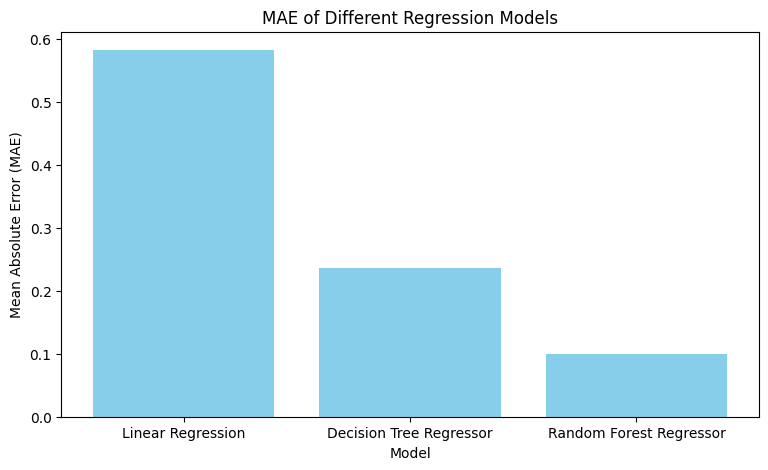

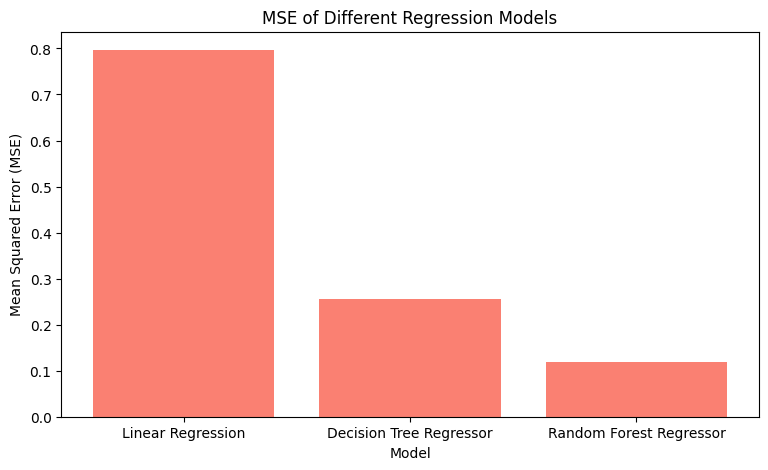

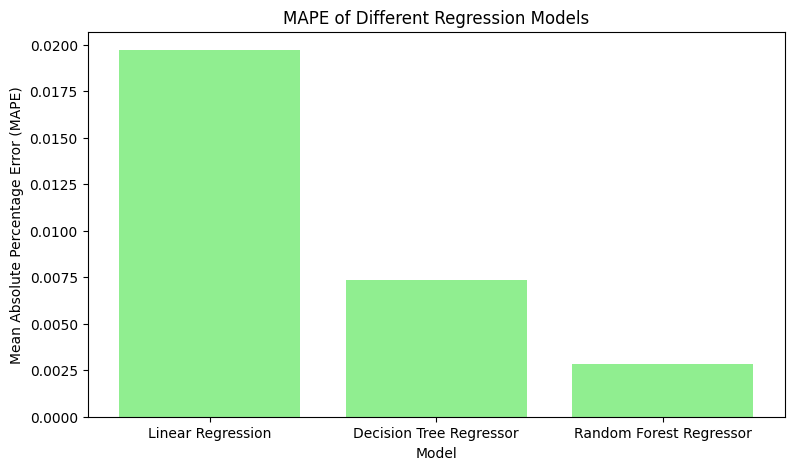

In [69]:

# 4. Plot bar charts

# Vẽ biểu đồ MAE
plt.figure(figsize=(9, 5))
plt.bar(results_df['Model'], results_df['MAE'], color='skyblue')
plt.title('MAE of Different Regression Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

# Vẽ biểu đồ MSE
plt.figure(figsize=(9, 5))
plt.bar(results_df['Model'], results_df['MSE'], color='salmon')
plt.title('MSE of Different Regression Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# Vẽ biểu đồ MAPE
plt.figure(figsize=(9, 5))
plt.bar(results_df['Model'], results_df['MAPE'], color='lightgreen')
plt.title('MAPE of Different Regression Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.show()

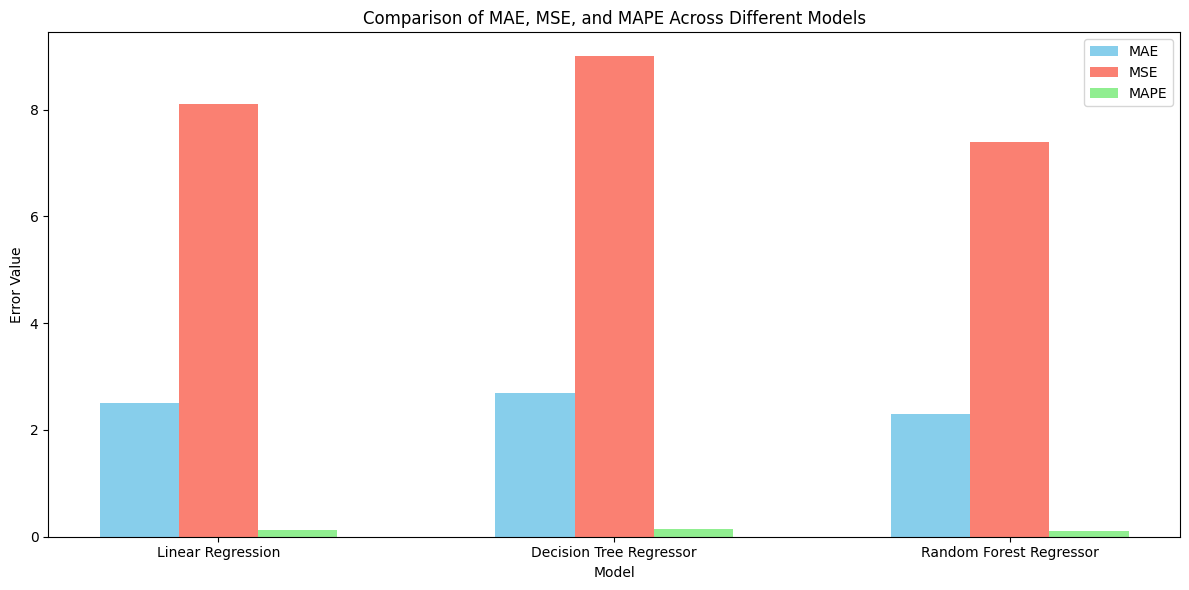

In [71]:
# Ví dụ kết quả (thay thế bằng kết quả thực tế của bạn)
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],
    'MAE': [2.5, 2.7, 2.3],
    'MSE': [8.1, 9.0, 7.4],
    'MAPE': [0.12, 0.14, 0.11]
})

# Gộp 3 biểu đồ thành 1
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = np.arange(len(results_df['Model']))

# Vẽ các thanh
bars1 = ax.bar(index, results_df['MAE'], bar_width, label='MAE', color='skyblue')
bars2 = ax.bar(index + bar_width, results_df['MSE'], bar_width, label='MSE', color='salmon')
bars3 = ax.bar(index + 2 * bar_width, results_df['MAPE'], bar_width, label='MAPE', color='lightgreen')

# Thêm thông tin biểu đồ
ax.set_xlabel('Model')
ax.set_ylabel('Error Value')
ax.set_title('Comparison of MAE, MSE, and MAPE Across Different Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(results_df['Model'])
ax.legend()

plt.tight_layout()
plt.show()